In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
num_words = 10000
maxlen = 200  

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [4]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\Priyanka\anaconda3\envs\qiskit-stable\lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - accuracy: 0.6789 - loss: 0.5894 - val_accuracy: 0.8472 - val_loss: 0.3588
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 368ms/step - accuracy: 0.8390 - loss: 0.3764 - val_accuracy: 0.8420 - val_loss: 0.3736
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - accuracy: 0.8875 - loss: 0.2841 - val_accuracy: 0.8104 - val_loss: 0.4201


In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8121 - loss: 0.4168
Test Accuracy: 81.46%


In [7]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 81.46%


In [8]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80     12500
           1       0.77      0.90      0.83     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000



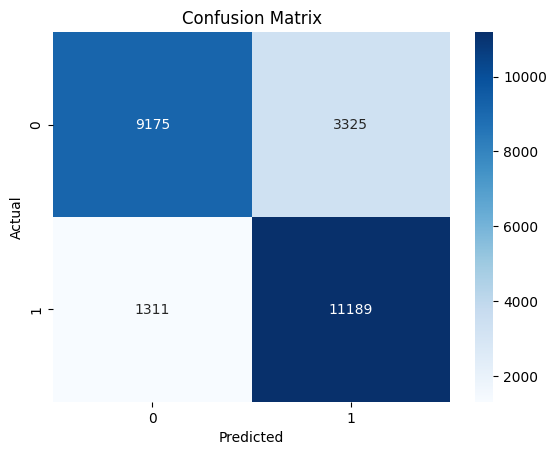

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualize Training Accuracy/Loss

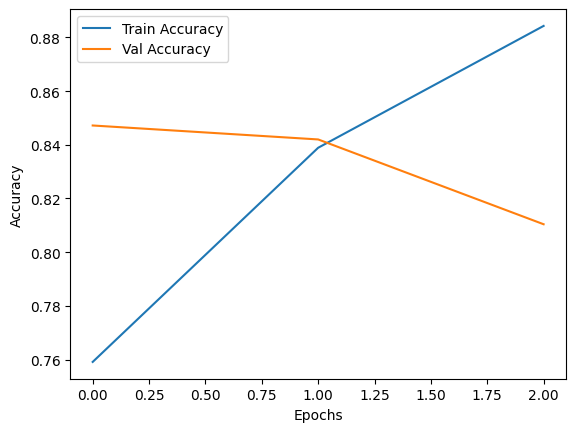

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load IMDB word index
word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

# Reconstruct a tokenizer using IMDB's word index
tokenizer = Tokenizer(num_words=10000)
tokenizer.word_index = word_index


In [13]:
def predict_sentiment(review, model, tokenizer, maxlen=200):
    review = review.lower()
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=maxlen)
    
    prediction = model.predict(padded)[0][0]
    
    if prediction >= 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {prediction:.2f})")


In [14]:
user_review = input("Enter a product/movie review: ")
predict_sentiment(user_review, model, tokenizer)


Enter a product/movie review: This movie was absolutely fantastic, I loved it!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Review: this movie was absolutely fantastic, i loved it!
Predicted Sentiment: Positive (Confidence: 0.50)
